<a href="https://colab.research.google.com/github/Starx93/CNN1/blob/main/CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
train = pd.read_csv("train.csv")
print("Train Shape : ",train.shape)

Train Shape :  (42000, 785)


In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#read test
test=pd.read_csv('test.csv')
print("Test Shape : ",test.shape)

Test Shape :  (28000, 784)


In [6]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y_train = train['label']
x_train = train.drop(labels=['label'], axis=1)

In [8]:
#finding how many numbers are there?
print('\t y_train value counts \n', y_train.value_counts())

	 y_train value counts 
 label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64


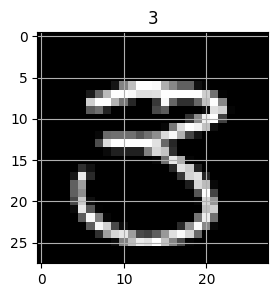

In [16]:
# plotting some examples
plt.figure(figsize=(5,3))
img = x_train.iloc[7].to_numpy()
img=img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(train.iloc[7,0])
plt.grid()
plt.show()

In [18]:
# Normalize the data
x_train = x_train/255
test = test/255
x_train.shape, test.shape

((42000, 784), (28000, 784))

In [19]:
# Reshape
x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
x_train.shape, test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [23]:
# Label Encoding
from keras.utils import to_categorical #convert to one-hot encoding
y_train = to_categorical(y_train,num_classes=10)

In [24]:
# Train-Test Split
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.1, random_state= 2)
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((37800, 28, 28, 1), (37800, 10), (4200, 28, 28, 1), (4200, 10))

In [28]:
# Creating a CNN Model
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
model = Sequential()
model.add(Conv2D(filters=8, kernel_size = (5,5), padding='Same', activation='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=16, kernel_size = (3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# Fully Connected
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [35]:
# Define the Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
# Data Augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

datagen.fit(x_train)

In [38]:
# Callbacks
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 6)

In [42]:
epochs = 100
batch_size = 250

In [43]:
history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size), epochs=epochs, validation_data= (x_val,y_val), steps_per_epoch=x_train.shape[0]//batch_size, callbacks=[early_stopping])

Epoch 1/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 109ms/step - accuracy: 0.7765 - loss: 0.6850 - val_accuracy: 0.9102 - val_loss: 0.3313
Epoch 2/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7760 - loss: 0.7605 - val_accuracy: 0.9098 - val_loss: 0.3345
Epoch 3/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.7861 - loss: 0.6526 - val_accuracy: 0.9102 - val_loss: 0.3181
Epoch 4/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8160 - loss: 0.5380 - val_accuracy: 0.9105 - val_loss: 0.3178
Epoch 5/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.7888 - loss: 0.6473 - val_accuracy: 0.9124 - val_loss: 0.3107
Epoch 6/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8080 - loss: 0.5688 - val_accuracy: 0.9126 - val_loss: 0.3101
Epoch 7/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7955 - loss: 0.6266 - val_accuracy: 0.9174 - val_loss: 0.2912
Epoch 8/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8320 - loss: 0.6202 -

In [45]:
# Evaluate the model
# model success
print("Accuracy of the model is --> " , model.evaluate(x_val, y_val, batch_size=batch_size)[1]*100 , "%")
print("Loss of the model is --> " , model.evaluate(x_val, y_val, batch_size=batch_size)[0])

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9764 - loss: 0.0915
Accuracy of the model is -->  97.33333587646484 %
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9764 - loss: 0.0915 
Loss of the model is -->  0.09399081021547318
